In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.signal import find_peaks
from scipy.stats import pearsonr

In [2]:
data = np.load("data/traces_1.npz", allow_pickle=True)
print(data.files)
print(data['dut_io_computed_data'].dtype)
print(f"Shape of traces captured is {data['wave'].shape}")
print(f"Shape of ciphertext data is {data['dut_io_computed_data'].shape}")
print(f"Shape of plaintext data is {data['dut_io_data'].shape}")

['wave', 'dut_io_data', 'dut_io_computed_data']
int32
Shape of traces captured is (2000, 200)
Shape of ciphertext data is (2000, 16)
Shape of plaintext data is (2000, 16)


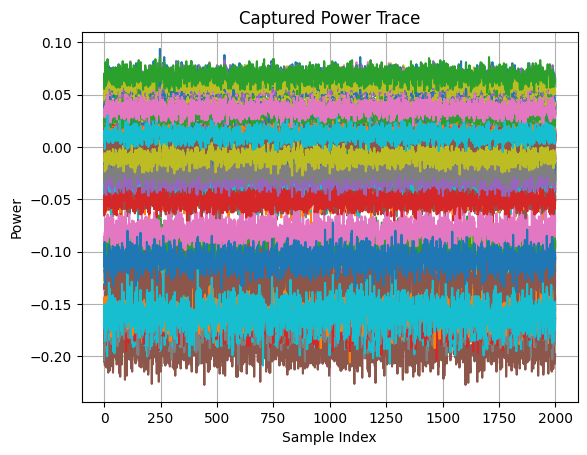

In [3]:
# Example: plot the waveform
waveform = data['wave']
plt.plot(waveform)
plt.title("Captured Power Trace")
plt.xlabel("Sample Index")
plt.ylabel("Power")
plt.grid(True)
plt.show()

In [4]:
SAMPLE_RATE_HZ = 29_500_000  # based on extclk_x4 * 7.37 MHz
time_axis = np.arange(waveform.shape[1]) / SAMPLE_RATE_HZ * 1e6  # time in µs

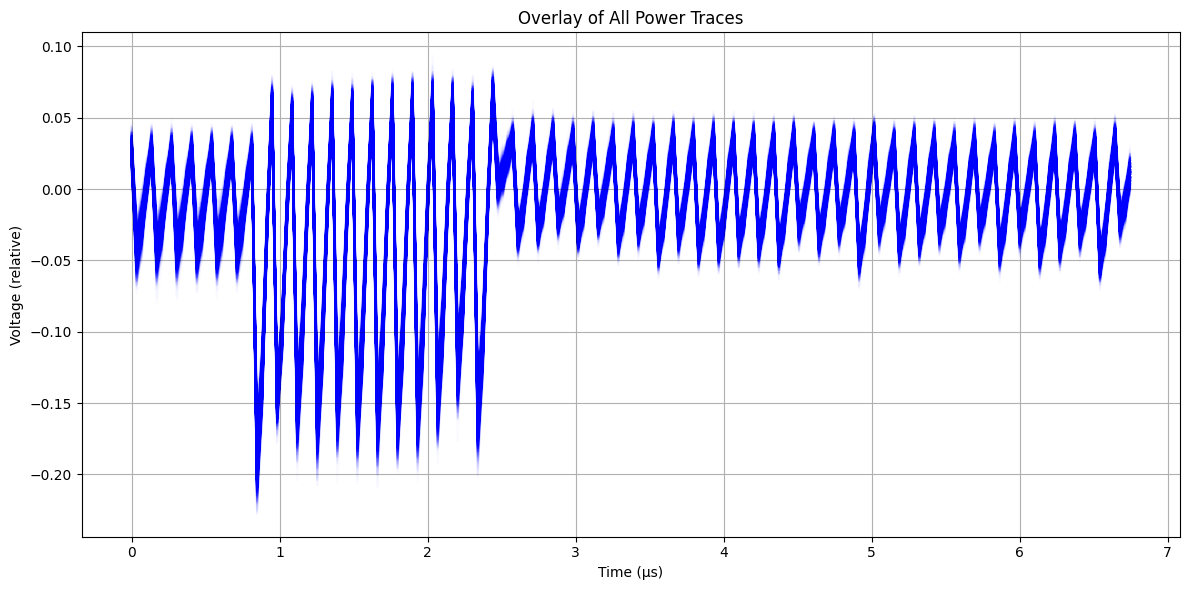

In [5]:
# === Plot all traces ===
plt.figure(figsize=(12, 6))
for trace in waveform:
    plt.plot(time_axis, trace, color='blue', alpha=0.02)  # alpha for transparency

plt.title("Overlay of All Power Traces")
plt.xlabel("Time (µs)")
plt.ylabel("Voltage (relative)")
plt.grid(True)
plt.tight_layout()
plt.show()

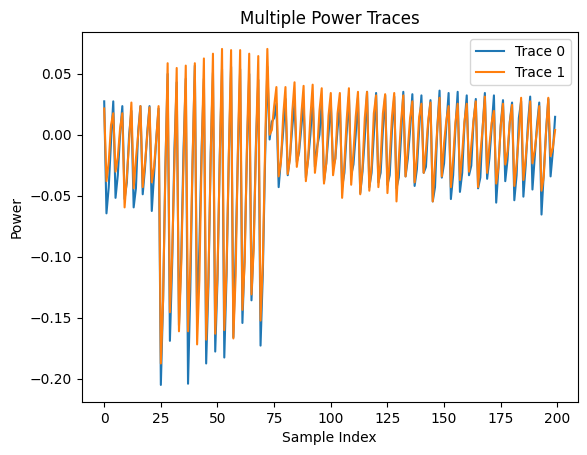

In [6]:
# multiple traces
for i in range(2):  # Plot first 2 traces
    plt.plot(data['wave'][i], label=f"Trace {i}")
plt.legend()
plt.title("Multiple Power Traces")
plt.xlabel("Sample Index")
plt.ylabel("Power")
plt.show()

# Attack Using S-Box output in the First round as intermediate Values

Calculating SNR...
Global SNR = 60.5080


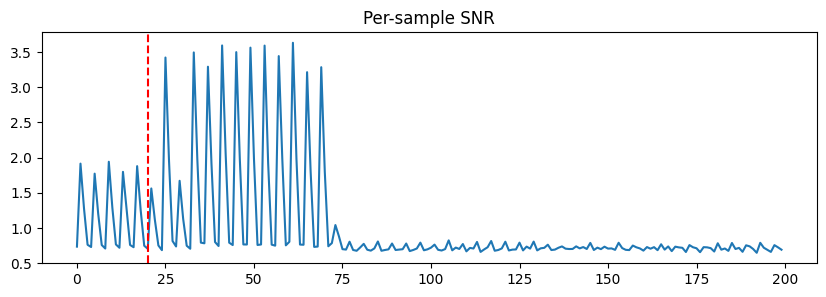

Detecting leakage window...


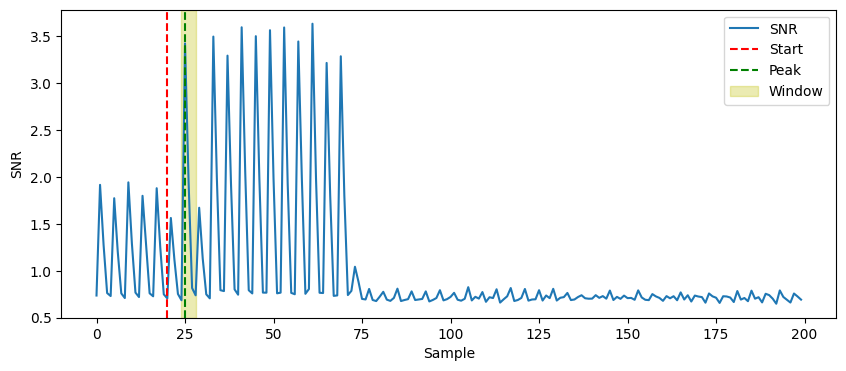

Window: (24, 28)
Testing power models on byte 0...
 Model hw: guess=0x91, corr=0.0804
 Model hd_in_out: guess=0xe6, corr=0.0733
 Model value: guess=0xb2, corr=0.0782
 Model msb: guess=0x36, corr=0.0763
Selected model: hw
CPA byte 0: 0x91 (corr=0.0804)
CPA byte 1: 0xcf (corr=0.0831)
CPA byte 2: 0xe4 (corr=0.0773)
CPA byte 3: 0x20 (corr=0.0698)
CPA byte 4: 0x00 (corr=0.0695)
CPA byte 5: 0xb0 (corr=0.0819)
CPA byte 6: 0xc5 (corr=0.0730)
CPA byte 7: 0xec (corr=0.0782)
CPA byte 8: 0x57 (corr=0.0666)
CPA byte 9: 0xfe (corr=0.0687)
CPA byte 10: 0xde (corr=0.0724)
CPA byte 11: 0x74 (corr=0.0764)
CPA byte 12: 0xa0 (corr=0.0805)
CPA byte 13: 0x88 (corr=0.0726)
CPA byte 14: 0x73 (corr=0.0751)
CPA byte 15: 0xc5 (corr=0.0699)


DPA byte 0: 100%|██████████| 256/256 [00:00<00:00, 1961.57it/s]


DPA byte 0: 0x8e (diff=0.0018)


DPA byte 1: 100%|██████████| 256/256 [00:00<00:00, 1714.81it/s]


DPA byte 1: 0x39 (diff=0.0019)


DPA byte 2: 100%|██████████| 256/256 [00:00<00:00, 2285.12it/s]


DPA byte 2: 0xd7 (diff=0.0019)


DPA byte 3: 100%|██████████| 256/256 [00:00<00:00, 1811.25it/s]


DPA byte 3: 0x72 (diff=0.0017)


DPA byte 4: 100%|██████████| 256/256 [00:00<00:00, 1791.29it/s]


DPA byte 4: 0xcc (diff=0.0018)


DPA byte 5: 100%|██████████| 256/256 [00:00<00:00, 1443.77it/s]


DPA byte 5: 0xaa (diff=0.0017)


DPA byte 6: 100%|██████████| 256/256 [00:00<00:00, 1925.46it/s]


DPA byte 6: 0xe0 (diff=0.0018)


DPA byte 7: 100%|██████████| 256/256 [00:00<00:00, 2061.42it/s]


DPA byte 7: 0x71 (diff=0.0016)


DPA byte 8: 100%|██████████| 256/256 [00:00<00:00, 1918.79it/s]


DPA byte 8: 0xfa (diff=0.0013)


DPA byte 9: 100%|██████████| 256/256 [00:00<00:00, 1698.92it/s]


DPA byte 9: 0x91 (diff=0.0016)


DPA byte 10: 100%|██████████| 256/256 [00:00<00:00, 1414.61it/s]


DPA byte 10: 0x56 (diff=0.0018)


DPA byte 11: 100%|██████████| 256/256 [00:00<00:00, 1701.92it/s]


DPA byte 11: 0xd9 (diff=0.0017)


DPA byte 12: 100%|██████████| 256/256 [00:00<00:00, 2368.35it/s]


DPA byte 12: 0x49 (diff=0.0017)


DPA byte 13: 100%|██████████| 256/256 [00:00<00:00, 1098.85it/s]


DPA byte 13: 0xed (diff=0.0017)


DPA byte 14: 100%|██████████| 256/256 [00:00<00:00, 1220.51it/s]


DPA byte 14: 0x55 (diff=0.0017)


DPA byte 15: 100%|██████████| 256/256 [00:00<00:00, 1716.50it/s]

DPA byte 15: 0x4f (diff=0.0018)
Recovered CPA key: 91cfe42000b0c5ec57fede74a08873c5
Recovered DPA key: 8e39d772ccaae071fa9156d949ed554f


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import pearsonr
from tqdm import tqdm

# AES S-box for intermediate value calculations
SBOX = np.array([
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
], dtype=np.uint8)

class PowerAnalyzer:
    """
    PowerAnalyzer performs DPA and CPA on AES first-round S-box,
    given power traces and corresponding plaintext/ciphertext byte arrays.
    """
    def __init__(self, traces: np.ndarray, plaintexts: np.ndarray,
                 ciphertexts: np.ndarray = None, encryption_start: int = 20):
        """
        Args:
            traces:       Power traces array of shape (num_traces, trace_length)
            plaintexts:   Plaintexts as byte-array of shape (num_traces, 16)
            ciphertexts:  Optional ciphertexts byte-array (not used here)
            encryption_start: sample index where encryption begins
        """
        self.traces = traces
        self.plaintexts = plaintexts
        self.ciphertexts = ciphertexts
        self.num_traces, self.trace_length = traces.shape
        self.encryption_start = encryption_start
        self.leakage_window = None

    def calculate_snr(self):
        """
        Compute global SNR and per-sample SNR across all traces.
        Returns:
            global_snr:    scalar
            snr_per_sample: 1D array of length trace_length
        """
        mean_trace = np.mean(self.traces, axis=0)
        var_trace  = np.var(self.traces, axis=0)
        signal = np.var(mean_trace)
        noise  = np.mean(var_trace)
        snr = signal / noise if noise > 0 else 0
        per_sample = var_trace / noise if noise > 0 else np.zeros_like(var_trace)
        return snr, per_sample

    def detect_leakage_window(self, snr_per_sample: np.ndarray, plot: bool = True):
        """
        Find time window around first-round S-box leakage by SNR peaks.
        """
        # consider only region after encryption start
        region = snr_per_sample[self.encryption_start:]
        peaks, _ = find_peaks(region, height=0.3*np.max(region), distance=5)
        if peaks.size > 0:
            peak = peaks[0] + self.encryption_start
        else:
            peak = np.argmax(region) + self.encryption_start
        # window = [peak-1, peak+3)
        start = max(self.encryption_start, peak - 1)
        end   = min(self.trace_length, peak + 3)
        self.leakage_window = (start, end)
        if plot:
            plt.figure(figsize=(10,4))
            plt.plot(snr_per_sample, label='SNR')
            plt.axvline(self.encryption_start, color='r', linestyle='--', label='Start')
            plt.axvline(peak, color='g', linestyle='--', label='Peak')
            plt.axvspan(start, end, alpha=0.3, color='y', label='Window')
            plt.legend(); plt.xlabel('Sample'); plt.ylabel('SNR'); plt.show()
        return self.leakage_window

    def dpa_attack(self, target_byte: int = 0, bit_index: int = 7):
        """
        Differential Power Analysis on one key byte.
        """
        if self.leakage_window is None:
            raise RuntimeError("Call detect_leakage_window first")
        start, end = self.leakage_window
        window = self.traces[:, start:end]
        # get that byte from each plaintext trace
        pt_byte = self.plaintexts[:, target_byte].astype(np.uint8)
        diffs = np.zeros((256, end-start))
        for kguess in tqdm(range(256), desc=f"DPA byte {target_byte}"):
            s_out = SBOX[pt_byte ^ kguess]
            mask  = 1 << bit_index
            g0 = window[(s_out & mask) == 0]
            g1 = window[(s_out & mask) != 0]
            m0 = g0.mean(axis=0) if g0.size else np.zeros(end-start)
            m1 = g1.mean(axis=0) if g1.size else np.zeros(end-start)
            diffs[kguess] = np.abs(m0 - m1)
        maxdiffs = diffs.max(axis=1)
        best = np.argmax(maxdiffs)
        return best, maxdiffs[best], diffs

    def cpa_attack(self, target_byte: int = 0, power_model: str = 'hw'):
        """
        Correlation Power Analysis on one key byte.
        """
        if self.leakage_window is None:
            raise RuntimeError("Call detect_leakage_window first")
        start, end = self.leakage_window
        window = self.traces[:, start:end]
        pt_byte = self.plaintexts[:, target_byte].astype(np.uint8)
        num_samples = end - start
        corrs = np.zeros((256, num_samples))
        # precompute hypothetical power for each guess
        hyp = np.zeros((256, self.num_traces))
        for kguess in range(256):
            inp = pt_byte ^ kguess
            out = SBOX[inp]
            if power_model == 'hw':
                hyp[kguess] = [bin(x).count('1') for x in out]
            elif power_model == 'hd_in_out':
                hyp[kguess] = [bin(i^o).count('1') for i,o in zip(inp, out)]
            elif power_model == 'value':
                hyp[kguess] = out
            elif power_model == 'msb':
                hyp[kguess] = (out >> 7) & 1
            else:
                raise ValueError("Unknown model")
        # compute Pearson correlation
        for kguess in range(256):
            for j in range(num_samples):
                c,_ = pearsonr(hyp[kguess], window[:, j])
                corrs[kguess, j] = abs(c)
        maxcorrs = corrs.max(axis=1)
        best = np.argmax(maxcorrs)
        return best, maxcorrs[best], corrs

    def recover_full_key(self, power_model: str = 'hd_in_out'):
        """
        Recover all 16 key bytes via CPA & DPA.
        """
        if self.leakage_window is None:
            raise RuntimeError("Detect leakage window first")
        cpa_key = bytearray(16)
        dpa_key = bytearray(16)
        for i in range(16):
            b, mc, _ = self.cpa_attack(i, power_model=power_model)
            cpa_key[i] = b
            print(f"CPA byte {i}: 0x{b:02x} (corr={mc:.4f})")
        for i in range(16):
            b, md, _ = self.dpa_attack(i)
            dpa_key[i] = b
            print(f"DPA byte {i}: 0x{b:02x} (diff={md:.4f})")
        return {'cpa_key': cpa_key, 'dpa_key': dpa_key}

def analyze_captured_data(traces, plaintexts, ciphertexts=None):
    """
    Run the full SNR → window detection → CPA/DPA recovery flow.
    """
    analyzer = PowerAnalyzer(traces, plaintexts, ciphertexts, encryption_start=20)
    print("Calculating SNR...")
    gsnr, per_snr = analyzer.calculate_snr()
    print(f"Global SNR = {gsnr:.4f}")
    plt.figure(figsize=(10,3))
    plt.plot(per_snr); plt.axvline(20, color='r', linestyle='--')
    plt.title("Per-sample SNR"); plt.show()

    print("Detecting leakage window...")
    window = analyzer.detect_leakage_window(per_snr)
    print(f"Window: {window}")

    print("Testing power models on byte 0...")
    best_model, best_corr = None, 0
    for model in ['hw','hd_in_out','value','msb']:
        b, corr, _ = analyzer.cpa_attack(0, model)
        print(f" Model {model}: guess=0x{b:02x}, corr={corr:.4f}")
        if corr > best_corr:
            best_corr, best_model = corr, model
    print(f"Selected model: {best_model}")

    return analyzer.recover_full_key(power_model=best_model)

# Example usage
if __name__ == "__main__":
    # assume data dict already loaded with byte-arrays:
    #   data['wave'] → np.ndarray shape (2000,200)
    #   data['dut_io_data'] → np.ndarray shape (2000,16), dtype=uint8
    #   data['dut_io_computed_data'] → np.ndarray shape (2000,16), dtype=uint8
    traces      = data['wave']
    plaintexts  = data['dut_io_data']
    ciphertexts = data['dut_io_computed_data']
    results = analyze_captured_data(traces, plaintexts, ciphertexts)
    print("Recovered CPA key:", results['cpa_key'].hex())
    print("Recovered DPA key:", results['dpa_key'].hex())

# Attack Using the Last Round of AES

✅ Data loaded successfully.
✅ Analyzer initialized with 2000 traces, each with 200 samples.

🚀 Attacking all 16 key bytes using CPA with 'HD' model...


Attacking Key Bytes:   6%|▋         | 1/16 [00:06<01:35,  6.35s/it]

   Byte 0: Guessed 0xd5 (Correct: 0xd5) -> Success!


Attacking Key Bytes:  12%|█▎        | 2/16 [00:12<01:24,  6.01s/it]

   Byte 1: Guessed 0x12 (Correct: 0x5e) -> Fail


Attacking Key Bytes:  19%|█▉        | 3/16 [00:18<01:19,  6.12s/it]

   Byte 2: Guessed 0x64 (Correct: 0x84) -> Fail


Attacking Key Bytes:  25%|██▌       | 4/16 [00:24<01:14,  6.21s/it]

   Byte 3: Guessed 0xa2 (Correct: 0xa7) -> Fail


Attacking Key Bytes:  31%|███▏      | 5/16 [00:30<01:06,  6.04s/it]

   Byte 4: Guessed 0x43 (Correct: 0x43) -> Success!


Attacking Key Bytes:  38%|███▊      | 6/16 [00:36<00:59,  5.91s/it]

   Byte 5: Guessed 0x97 (Correct: 0x25) -> Fail


Attacking Key Bytes:  44%|████▍     | 7/16 [00:42<00:53,  5.90s/it]

   Byte 6: Guessed 0x89 (Correct: 0x20) -> Fail


Attacking Key Bytes:  50%|█████     | 8/16 [00:47<00:46,  5.87s/it]

   Byte 7: Guessed 0x48 (Correct: 0xbc) -> Fail


Attacking Key Bytes:  56%|█████▋    | 9/16 [00:53<00:41,  5.87s/it]

   Byte 8: Guessed 0xc0 (Correct: 0xc0) -> Success!


Attacking Key Bytes:  62%|██████▎   | 10/16 [00:59<00:35,  5.91s/it]

   Byte 9: Guessed 0x4e (Correct: 0x24) -> Fail


Attacking Key Bytes:  69%|██████▉   | 11/16 [01:05<00:29,  5.99s/it]

   Byte 10: Guessed 0x14 (Correct: 0x83) -> Fail


Attacking Key Bytes:  75%|███████▌  | 12/16 [01:11<00:23,  5.90s/it]

   Byte 11: Guessed 0xe3 (Correct: 0x88) -> Fail


Attacking Key Bytes:  81%|████████▏ | 13/16 [01:17<00:17,  5.86s/it]

   Byte 12: Guessed 0x1d (Correct: 0x1d) -> Success!


Attacking Key Bytes:  88%|████████▊ | 14/16 [01:23<00:11,  5.83s/it]

   Byte 13: Guessed 0x31 (Correct: 0x15) -> Fail


Attacking Key Bytes:  94%|█████████▍| 15/16 [01:29<00:05,  5.99s/it]

   Byte 14: Guessed 0x9d (Correct: 0x88) -> Fail


Attacking Key Bytes: 100%|██████████| 16/16 [01:35<00:00,  5.94s/it]

   Byte 15: Guessed 0x37 (Correct: 0x0) -> Fail

--- Attack Summary ---
✅ Recovered Last Round Key: d51264a243978948c04e14e31d319d37
   (Correct Last Round Key: d55e84a7432520bcc02483881d158800)

🔑 Deriving original key from the last round key...
   Derived Original Key:     19ca8fe41c774747842343506212fad8
   True Original Key:        10a58869d74be5a374cf867cfb473859

❌ FAILURE: The derived key does not match the true key.

🖼️  Generating plots for the last attacked byte (Byte 15)...


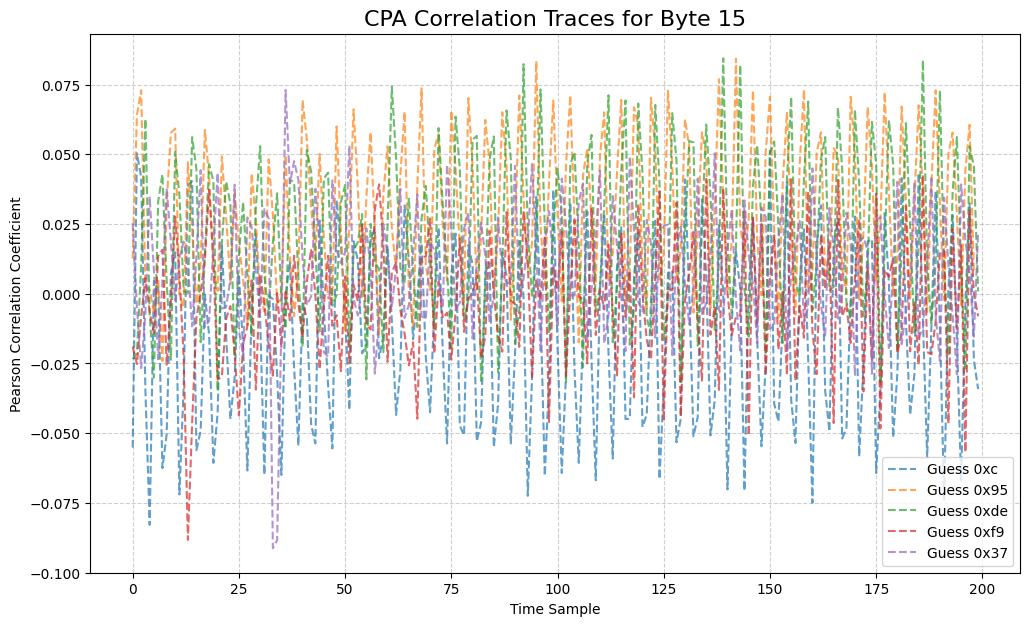


📊 Calculating SNR for byte 15...
   SNR calculated. Max SNR value: 0.1977


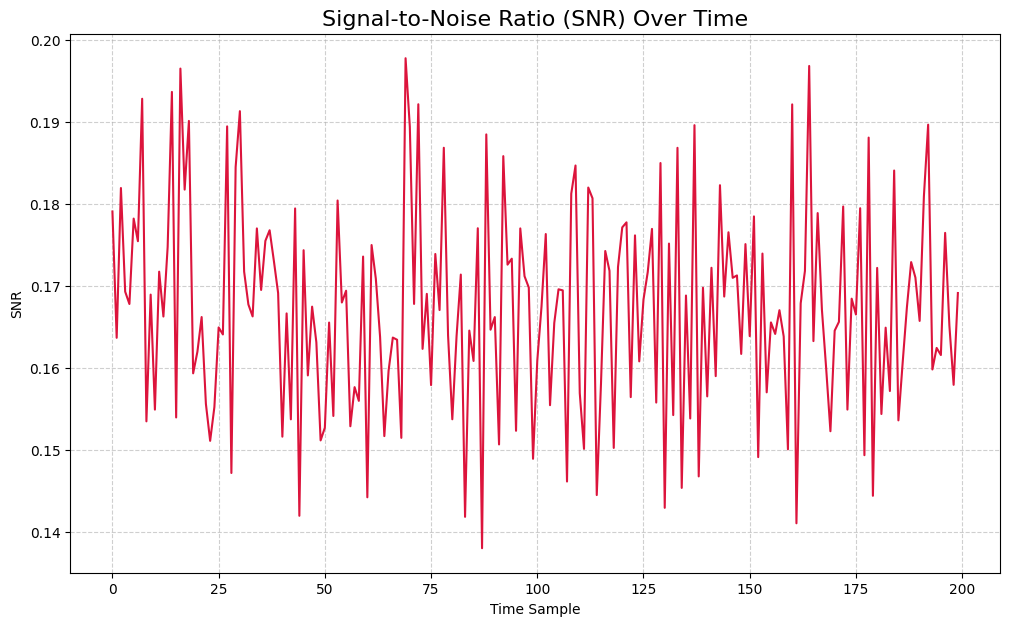


✅ Analysis Complete.


In [30]:
# --- AES Constants (S-Boxes, Rcon) ---

# AES Inverse S-Box (for last-round attack)
INV_S_BOX = np.array([
    0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e, 0x81, 0xf3, 0xd7, 0xfb,
    0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb,
    0x54, 0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
    0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25,
    0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92,
    0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
    0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3, 0x45, 0x06,
    0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b,
    0x3a, 0x91, 0x11, 0x41, 0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
    0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e,
    0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b,
    0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
    0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f,
    0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef,
    0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0c, 0x7d
])

# AES Forward S-Box (for key schedule reversal)
S_BOX = np.array([
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
])

# Round constants for key schedule
RCON = np.array([
    0x00, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1b, 0x36
])

# Hamming Weight lookup table
HW_TABLE = np.array([bin(n).count('1') for n in range(256)], dtype=np.uint8)

class SideChannelAnalyzer:
    """
    A class to perform CPA and DPA attacks on AES power traces.
    Targets the last round: `intermediate = InvSubBytes(InvShiftRows(ciphertext) ^ key)`
    """
    def __init__(self, traces, plaintexts, ciphertexts, correct_key=None):
        """Initializes the analyzer with measurement data."""
        self.traces = traces
        self.plaintexts = plaintexts
        self.ciphertexts = ciphertexts
        self.correct_key = correct_key  # This should be the ORIGINAL key
        self.num_traces = traces.shape[0]
        self.num_samples = traces.shape[1]
        
        print(f"✅ Analyzer initialized with {self.num_traces} traces, each with {self.num_samples} samples.")

    def _inv_shift_rows(self, state):
        """Performs the inverse ShiftRows operation on the AES state."""
        # For AES decryption, we need to reverse the ShiftRows operation
        # The state is a 16-byte array in column-major order
        shifted = np.zeros(16, dtype=np.uint8)
        
        # Row 0: no shift
        shifted[0] = state[0]
        shifted[4] = state[4]
        shifted[8] = state[8]
        shifted[12] = state[12]
        
        # Row 1: right shift by 1
        shifted[1] = state[13]
        shifted[5] = state[1]
        shifted[9] = state[5]
        shifted[13] = state[9]
        
        # Row 2: right shift by 2
        shifted[2] = state[10]
        shifted[6] = state[14]
        shifted[10] = state[2]
        shifted[14] = state[6]
        
        # Row 3: right shift by 3
        shifted[3] = state[7]
        shifted[7] = state[11]
        shifted[11] = state[15]
        shifted[15] = state[3]
        
        return shifted

    def _get_power_hypothesis(self, intermediate_values, model_type='HW'):
        """Calculates the hypothetical power consumption based on a model."""
        if model_type == 'HW':  # Hamming Weight
            return HW_TABLE[intermediate_values]
        elif model_type == 'MSB':  # Most Significant Bit
            return (intermediate_values >> 7) & 1
        else:
            raise ValueError(f"Unsupported power model: {model_type}. Use 'HW' or 'MSB'.")

    def run_cpa(self, target_byte, power_model='HW', trace_limit=None):
        """Performs a Correlation Power Analysis attack on a single byte."""
        limit = trace_limit if trace_limit is not None else self.num_traces
        
        traces_subset = self.traces[:limit, :]
        ciphertexts_subset = self.ciphertexts[:limit]
        
        max_correlations = np.zeros(256)
        correlation_traces = np.zeros((256, self.num_samples))
        
        trace_mean = np.mean(traces_subset, axis=0)
        trace_std_dev = np.std(traces_subset, axis=0)

        for k_guess in range(256):
            # Apply inverse ShiftRows to ciphertext before XOR with key guess
            inv_shifted = np.array([self._inv_shift_rows(ct) for ct in ciphertexts_subset])
            ciphertext_bytes = inv_shifted[:, target_byte]
            
            intermediate_vals = INV_S_BOX[ciphertext_bytes ^ k_guess]
            
            if power_model == 'HD':
                # HD models power consumption of a register flip-flopping.
                # It's the Hamming Weight of the XOR between the old and new state.
                hypothesis = HW_TABLE[intermediate_vals ^ ciphertext_bytes]
            else:
                hypothesis = self._get_power_hypothesis(intermediate_vals, power_model)

            hyp_mean = np.mean(hypothesis)
            hyp_std_dev = np.std(hypothesis)
            
            if hyp_std_dev == 0:
                correlation_traces[k_guess, :] = 0
                continue

            numerator = np.mean(hypothesis[:, np.newaxis] * traces_subset, axis=0) - (hyp_mean * trace_mean)
            denominator = hyp_std_dev * trace_std_dev
            
            # Prevent division by zero at time samples with no variation
            correlation_traces[k_guess, :] = np.divide(numerator, denominator, out=np.zeros_like(numerator), where=denominator!=0)
        
        max_correlations = np.max(np.abs(correlation_traces), axis=1)
        return max_correlations, correlation_traces

    def run_dpa(self, target_byte, trace_limit=None):
        """Performs a Differential Power Analysis attack on a single byte."""
        limit = trace_limit if trace_limit is not None else self.num_traces
        
        traces_subset = self.traces[:limit, :]
        ciphertexts_subset = self.ciphertexts[:limit]
        
        max_diffs = np.zeros(256)

        for k_guess in range(256):
            # Apply inverse ShiftRows to ciphertext before XOR with key guess
            inv_shifted = np.array([self._inv_shift_rows(ct) for ct in ciphertexts_subset])
            ciphertext_bytes = inv_shifted[:, target_byte]
            
            intermediate_vals = INV_S_BOX[ciphertext_bytes ^ k_guess]
            selection_bit = self._get_power_hypothesis(intermediate_vals, 'MSB')
            
            traces_set_0 = traces_subset[selection_bit == 0]
            traces_set_1 = traces_subset[selection_bit == 1]
            
            if len(traces_set_0) == 0 or len(traces_set_1) == 0:
                continue
                
            mean_0 = np.mean(traces_set_0, axis=0)
            mean_1 = np.mean(traces_set_1, axis=0)
            max_diffs[k_guess] = np.max(np.abs(mean_1 - mean_0))
            
        return max_diffs
        
    def calculate_snr(self, target_byte, last_round_key_byte):
        """Calculates the SNR for a given byte's intermediate value."""
        print(f"\n📊 Calculating SNR for byte {target_byte}...")
        
        # Apply inverse ShiftRows to ciphertext before XOR with key byte
        inv_shifted = np.array([self._inv_shift_rows(ct) for ct in self.ciphertexts])
        ciphertext_bytes = inv_shifted[:, target_byte]
        
        intermediate_vals = INV_S_BOX[ciphertext_bytes ^ last_round_key_byte]
        
        unique_vals = np.unique(intermediate_vals)
        grouped_traces = [self.traces[intermediate_vals == val] for val in unique_vals]
        
        # Noise: Mean of variances within each group
        variances_per_group = [np.var(group, axis=0) for group in grouped_traces if len(group) > 1]
        mean_of_vars = np.mean(variances_per_group, axis=0)

        # Signal: Variance of means between groups
        means_per_group = [np.mean(group, axis=0) for group in grouped_traces]
        var_of_means = np.var(means_per_group, axis=0)
        
        # Avoid division by zero
        snr = np.divide(var_of_means, mean_of_vars, out=np.zeros_like(var_of_means), where=mean_of_vars!=0)
        
        print(f"   SNR calculated. Max SNR value: {np.max(snr):.4f}")
        return snr

    @staticmethod
    def derive_base_key_128(last_round_key):
        """Reverses the AES-128 key schedule to find the original key."""
        def rot_word(w): return np.roll(w, -1)
        def sub_word(w): return S_BOX[w]

        round_key = last_round_key.copy()
        
        for r in range(10, 0, -1):
            prev_round_key = np.zeros(16, dtype=np.uint8)
            
            prev_round_key[12:16] = round_key[12:16] ^ round_key[8:12]
            prev_round_key[8:12]  = round_key[8:12]  ^ round_key[4:8]
            prev_round_key[4:8]   = round_key[4:8]   ^ round_key[0:4]
            
            temp_word = sub_word(rot_word(prev_round_key[12:16]))
            rcon_word = np.array([RCON[r], 0, 0, 0], dtype=np.uint8)
            prev_round_key[0:4] = round_key[0:4] ^ temp_word ^ rcon_word
            
            round_key = prev_round_key

        return round_key

    def plot_correlation_traces(self, correlation_traces, target_byte, correct_key_byte, num_to_plot=5):
        """Plots the correlation traces for the best guesses."""
        plt.figure(figsize=(12, 7))
        plt.title(f'CPA Correlation Traces for Byte {target_byte}', fontsize=16)
        
        top_indices = np.argsort(np.max(np.abs(correlation_traces), axis=1))[-num_to_plot:]
        
        for k_guess in top_indices:
            label, style, width, alpha = f'Guess {hex(k_guess)}', '--', 1.5, 0.7
            if k_guess == correct_key_byte:
                label, style, width, alpha = f'Guess {hex(k_guess)} (Correct)', '-', 2.5, 1.0
            
            plt.plot(correlation_traces[k_guess], label=label, linestyle=style, linewidth=width, alpha=alpha)
            
        plt.xlabel('Time Sample')
        plt.ylabel('Pearson Correlation Coefficient')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

    def plot_snr(self, snr_trace):
        """Plots the calculated SNR over time."""
        if snr_trace is None: return
        plt.figure(figsize=(12, 7))
        plt.title('Signal-to-Noise Ratio (SNR) Over Time', fontsize=16)
        plt.plot(snr_trace, color='crimson')
        plt.xlabel('Time Sample')
        plt.ylabel('SNR')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# --- Main Execution Block ---
if __name__ == '__main__':
    
    # 1. LOAD YOUR DATA
    try:
        data = np.load("data/traces_1.npz", allow_pickle=True)
        plaintexts = data['dut_io_data']
        ciphertexts = data['dut_io_computed_data']
        traces = data['wave']
        print("✅ Data loaded successfully.")
    except FileNotFoundError:
        print("❌ Error: file not found. Please check the file path.")
        exit()

    # The TRUE original key (for verification purposes)
    TRUE_KEY = np.array([0x10, 0xa5, 0x88, 0x69, 0xd7, 0x4b, 0xe5, 0xa3,
                         0x74, 0xcf, 0x86, 0x7c, 0xfb, 0x47, 0x38, 0x59], dtype=np.uint8)
    

    TRUE_LAST_ROUND_KEY = np.array([0xd5, 0x5e, 0x84, 0xa7, 0x43, 0x25, 0x20, 0xbc, 
                                    0xc0, 0x24, 0x83, 0x88, 0x1d, 0x15, 0x88, 0x00], dtype=np.uint8)
    
    # 2. INITIALIZE ANALYZER
    analyzer = SideChannelAnalyzer(traces, plaintexts, ciphertexts)

    # 3. RECOVER THE FULL LAST ROUND KEY
    recovered_last_round_key = np.zeros(16, dtype=np.uint8)
    power_model_to_use = 'HD' # 'HD' is often effective for the last round
    
    print(f"\n🚀 Attacking all 16 key bytes using CPA with '{power_model_to_use}' model...")
    for byte_idx in tqdm(range(16), desc="Attacking Key Bytes"):
        cpa_max_corrs, cpa_corr_traces = analyzer.run_cpa(byte_idx, power_model=power_model_to_use)
        recovered_byte = np.argmax(cpa_max_corrs)
        recovered_last_round_key[byte_idx] = recovered_byte
        
        print(f"   Byte {byte_idx}: Guessed {hex(recovered_byte)} (Correct: {hex(TRUE_LAST_ROUND_KEY[byte_idx])}) -> {'Success!' if recovered_byte == TRUE_LAST_ROUND_KEY[byte_idx] else 'Fail'}")

    print("\n--- Attack Summary ---")
    print(f"✅ Recovered Last Round Key: {bytes(recovered_last_round_key).hex()}")
    print(f"   (Correct Last Round Key: {bytes(TRUE_LAST_ROUND_KEY).hex()})")

    # 4. DERIVE THE ORIGINAL KEY
    print("\n🔑 Deriving original key from the last round key...")
    recovered_base_key = SideChannelAnalyzer.derive_base_key_128(recovered_last_round_key)
    print(f"   Derived Original Key:     {bytes(recovered_base_key).hex()}")
    print(f"   True Original Key:        {bytes(TRUE_KEY).hex()}")

    if np.array_equal(recovered_base_key, TRUE_KEY):
        print("\n🎉 SUCCESS: The derived original key matches the true key!")
    else:
        print("\n❌ FAILURE: The derived key does not match the true key.")

    # 5. VISUALIZE RESULTS FOR A SINGLE BYTE (e.g., the last one attacked)
    print("\n🖼️  Generating plots for the last attacked byte (Byte 15)...")
    target_byte_for_plots = 15
    _, final_corr_traces = analyzer.run_cpa(target_byte_for_plots, power_model=power_model_to_use)
    
    # Plot correlations
    analyzer.plot_correlation_traces(final_corr_traces, target_byte_for_plots, 
                                      correct_key_byte=TRUE_LAST_ROUND_KEY[target_byte_for_plots])
    
    # Plot SNR
    snr_trace = analyzer.calculate_snr(target_byte_for_plots, 
                                       last_round_key_byte=TRUE_LAST_ROUND_KEY[target_byte_for_plots])
    analyzer.plot_snr(snr_trace)

    print("\n✅ Analysis Complete.")